In [31]:

# Panda library to read csv file
import pandas as pd
DT_data = pd.read_csv("credit.csv",index_col=0)
DT_data.head(5)
DT_data.head(0)
DT_data['RESPONSE'].head(5)
DT_data.describe()



,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.577000,20.903000,2.54500,0.234000,0.103000,0.181000,0.280000,0.050000,0.097000,3271.258000,...,35.546000,0.186000,0.179000,0.713000,1.407000,1.904000,1.155000,0.404000,0.037000,0.700000
std,1.257638,12.058814,1.08312,0.423584,0.304111,0.385211,0.449224,0.218054,0.296106,2822.736876,...,11.375469,0.389301,0.383544,0.452588,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,...,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1365.500000,...,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,18.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.500000,...,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,24.000000,4.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3972.250000,...,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,72.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18424.000000,...,75.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


In [32]:
# Train / Test split
DT_train=DT_data[0:700]
DT_test=DT_data[700:1000]
'''
X = DT_data.values[:, 1:31]
Y = DT_data.values[:, 31]
'''
 

x_vars=['CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'AMOUNT', 'SAV_ACCT', 'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE', 'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT', 'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT', 'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE', 'FOREIGN']


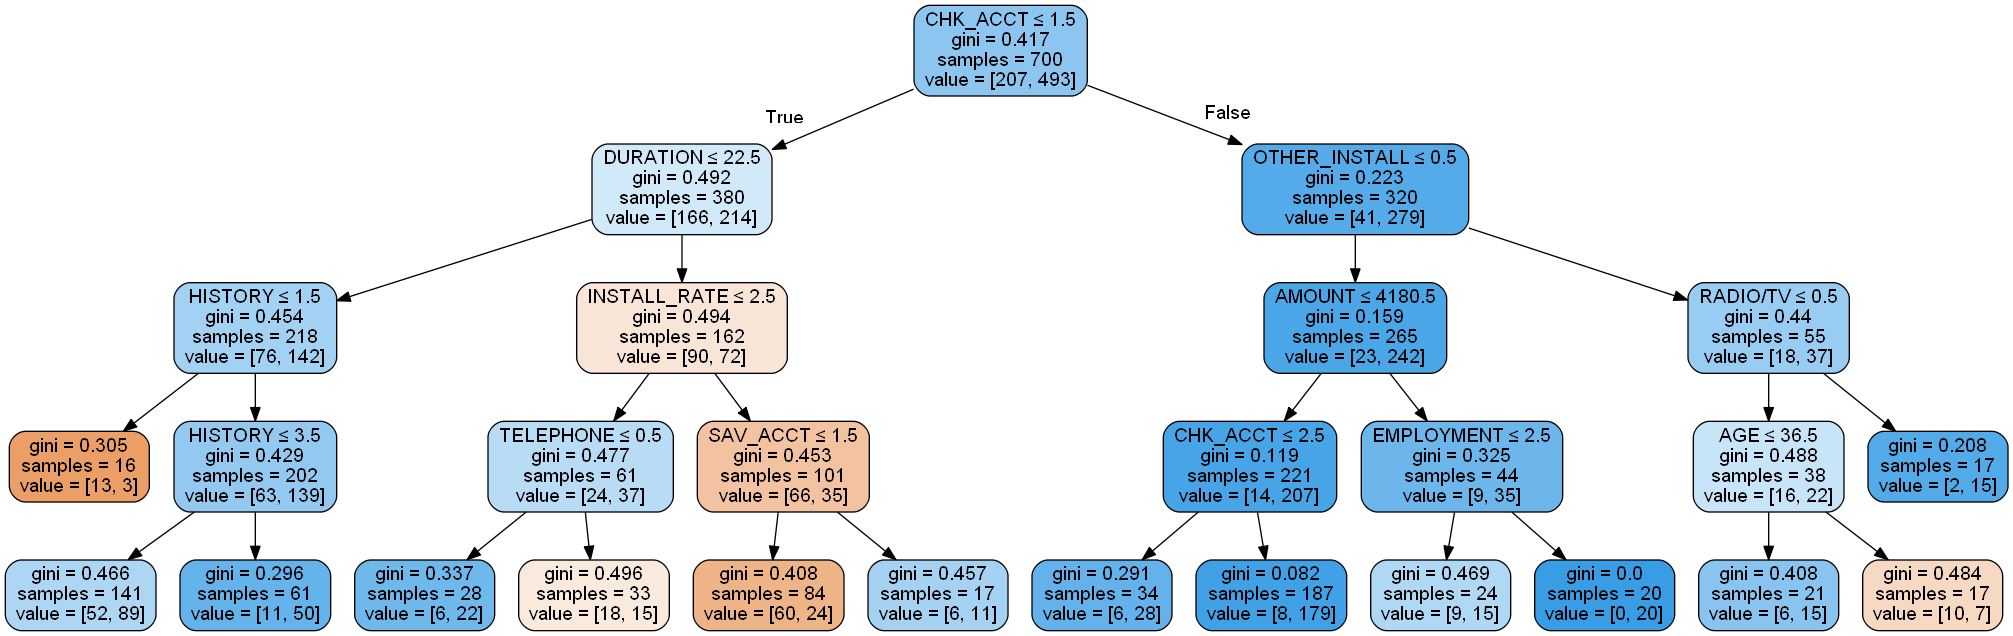

In [34]:
# Developing decision tree
from sklearn import tree

cl_tree = tree.DecisionTreeClassifier(criterion='gini',
                                         random_state = 100,
                               max_depth=4, min_samples_leaf=15)



cl_tree=cl_tree.fit(DT_train[x_vars], DT_train['RESPONSE'])

pred=cl_tree.predict(DT_test[x_vars])
pd.crosstab(pred,DT_test['RESPONSE'])



from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(cl_tree, out_file=dot_data, feature_names=x_vars, 
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

import graphviz 
Image(graph.create_png())